In [4]:
import pandas as pd
import numpy as np
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import spacy
import sklearn
from textblob import TextBlob

tb= TextBlob
#Folders
DATA_FOLDER_RateBeer ='D:/Master/Cours/MA3/ADA2023/Project/Data/Rate_beer_data/'
DATA_FOLDER_MatchedBeer ='D:/Master/Cours/MA3/ADA2023/Project/Data/matched_beer_data/'
DATA_FOLDER_BeerAdvocate ='D:/Master/Cours/MA3/ADA2023/Project/Data/BeerAdvocate_data/'

#files in function of the folders
#files of RateBeer folder
BEERS_RateBeer_DATASET = DATA_FOLDER_RateBeer + "beers.csv"
BREWERIES_RateBeer_DATASET=DATA_FOLDER_RateBeer + "breweries.csv"
USERS_RateBeer_DATASET=DATA_FOLDER_RateBeer+"users.csv"
#files of BeerAdvocate
BEERS_BeerAdvocate_DATASET = DATA_FOLDER_BeerAdvocate + "beers.csv"
BREWERIES_BeerAdvocate_DATASET=DATA_FOLDER_BeerAdvocate + "breweries.csv"
USERS_BeerAdvocate_DATASET=DATA_FOLDER_BeerAdvocate+"users.csv"
#files of matched_beer_data
BEERS_MatchedBeer_DATASET = DATA_FOLDER_MatchedBeer + "beers.csv"
BREWERIES_MatchedBeer_DATASET=DATA_FOLDER_MatchedBeer + "breweries.csv"
USERS_MatchedBeer_DATASET=DATA_FOLDER_MatchedBeer+"users.csv"
RATINGS_MatchedBeer_DATASET=DATA_FOLDER_MatchedBeer+"ratings.csv"
USERS_APPROX_MatchedBeer_DATASET=DATA_FOLDER_MatchedBeer+"users_approx.csv"


In [5]:
beers_RateBeer=pd.read_csv(BEERS_RateBeer_DATASET, header=1)
breweries_RateBeer=pd.read_csv(BREWERIES_RateBeer_DATASET, header=1)
users_RateBeer=pd.read_csv(USERS_RateBeer_DATASET, header=1)
beers_BeerAdvocate=pd.read_csv(BEERS_BeerAdvocate_DATASET, header=1)
breweries_BeerAdvocate=pd.read_csv(BREWERIES_BeerAdvocate_DATASET, header=1)
users_BeerAdvocate=pd.read_csv(USERS_BeerAdvocate_DATASET, header=1)
beers_MatchedBeer=pd.read_csv(BEERS_MatchedBeer_DATASET, header=1)
breweries_MatchedBeer=pd.read_csv(BREWERIES_MatchedBeer_DATASET, header=1)
users_MatchedBeer=pd.read_csv(USERS_MatchedBeer_DATASET, header=1)
users_approx_MatchedBeer=pd.read_csv(USERS_APPROX_MatchedBeer_DATASET, header=1)
ratings_MatchedBeer=pd.read_csv(RATINGS_MatchedBeer_DATASET, header=1, low_memory=False)

In [7]:
ratings_MatchedBeer_BA=ratings_MatchedBeer[ratings_MatchedBeer.columns[:16]]
ratings_MatchedBeer_RB=ratings_MatchedBeer[ratings_MatchedBeer.columns[17:32]]
ratings_MatchedBeer_BA=ratings_MatchedBeer_BA[~ratings_MatchedBeer_BA['text'].isnull()]
ratings_MatchedBeer_RB=ratings_MatchedBeer_RB[~ratings_MatchedBeer_RB['text.1'].isnull()]
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("()", "")
    ReviewText = ReviewText.str.replace('().*()', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
ratings_MatchedBeer_BA['text']= preprocess(ratings_MatchedBeer_BA['text'])
ratings_MatchedBeer_RB['text.1']= preprocess(ratings_MatchedBeer_RB['text.1'])

#Beer advocate sentiment polarity
ratings_MatchedBeer_BA['polarity'] = ratings_MatchedBeer_BA['text'].map(lambda text: tb(text).sentiment.polarity)
ratings_MatchedBeer_BA['review_len'] = ratings_MatchedBeer_BA['text'].astype(str).apply(len)
ratings_MatchedBeer_BA['word_count'] = ratings_MatchedBeer_BA['text'].apply(lambda x: len(str(x).split()))

#Rating Beer sentiment polarity
ratings_MatchedBeer_RB['polarity'] = ratings_MatchedBeer_RB['text.1'].map(lambda text: tb(text).sentiment.polarity)
ratings_MatchedBeer_RB['review_len'] = ratings_MatchedBeer_RB['text.1'].astype(str).apply(len)
ratings_MatchedBeer_RB['word_count'] = ratings_MatchedBeer_RB['text.1'].apply(lambda x: len(str(x).split()))

In [8]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB.polarity == 1, ['text.1']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

Has a feint scent of caramel, taste is awesome mix of alcohol and toffee. St. Paul Beer Fest---Rated via Beer Buddy for iPhone
on tap at the source. newest release. excellent apa bursting with galaxy and nelson. citrus hops also in aroma.
Forte amertume persistante en bouche. Bon retour. Orange, raisins, agrumes et un peu dâÃ©pices. Une excellent IPA !
Uhhhh yum! Tastes like nutella overlaid a chocolate biscuit. Delicious. Desert. Meal. nitro tap at rogue in pdx. Some vanilla wafer aromas. Canât wait for my pizza to come...
Really excellent aroma with toffee, caramel, fruit, hops, toast, grass. Flavorâs like nose, but thereâs a hint of medicine in the finish. Otherwise itâs just smack dab on.


In [11]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB.polarity == 0, ['text.1']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

Biere, foin, pain grillÃ©, terreux, banane, caramel Ã©cossais, fromage, odeurs de renfermÃ©, fromage, agrume, Ã©curiem, Ã©curie, Ã©curie, agrume, agrume, pin, Ã©curie, agrume, roti, fines herbes, Ã©curie, herbe, pain grillÃ©, agrume, Ã©curie, pain grillÃ©
Recent find, black saison. Comes across like a lighter blackbier, with some pepper. Decent enough beer to try, though nothing to grab me.
On tap at owl farm. Hop aroma, with tartness, hops and spice. Not what I was expecting at all. Prairie territory.
Bottle from Premier Gourmet. Reddish than black. Cherry in the finish. Decent porter with cherry taste. lighter mouthfeel for a porter.
Her skjer det mye! MÃ¸rkt Ã¸l med beige topp. Duft av hasselnÃ¸tter, kakao, knekk og ristet malt. Smaken er dominert av nÃ¸tter, sÃ¸t karamell, kaffedrops og noe lakris. ogsÃ¥ veldig lette brente toner. Kledelig munnfÃ¸lelse.


In [14]:
ratings_MatchedBeer_RB.polarity

0        False
1        False
2        False
3        False
4        False
         ...  
21959    False
21960    False
21961    False
21962    False
21963    False
Name: polarity, Length: 21964, dtype: bool

In [18]:
print('2 reviews with the most negative polarity: \n')
cl = ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB.polarity <0, ['text.1']].sample(2).values
for c in cl:
    print(c[0])

2 reviews with the most negative polarity: 

50cl Can: brought back from Switzerland by my Son-in-Law. Poured into a Duvel glass at home on 22nd Oct 13.Pale yellow/gold with a full, but fading white head, instant wisp and collar.Bland, boring and semi-dry in nature. This had nothing going for it. Almost odourless and tasteless with no redeeming features, getting more and more metallic as it warmed.It may well be refreshing after a day skiing or chasing cows with bells on, but sat at home in Shropshire tasting different beers it failed on all fronts. It did follow wheat beers from Northern Ireland and Denmark, so maybe I should have had it first? Even so it was very poor.
From Tarico. In Teku glass. Removing beer labels. Very foamy, with an ugly dirty colour. At first lacks taste and aroma apart from something unpleasant,lightly vegetal and yeast. When warms up it improves a bit with some citric notes


<Axes: ylabel='Frequency'>

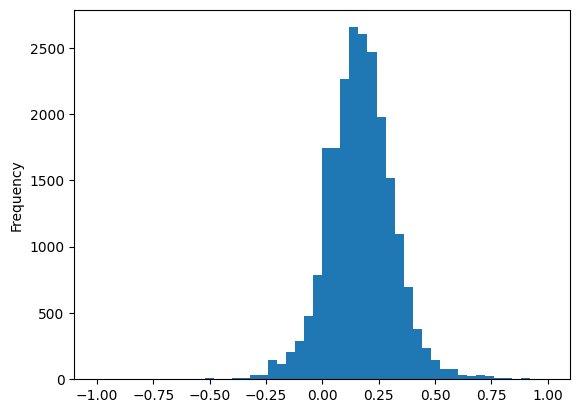

In [16]:
ratings_MatchedBeer_RB['polarity'].plot(kind='hist', bins=50)

<Axes: xlabel='style.1'>

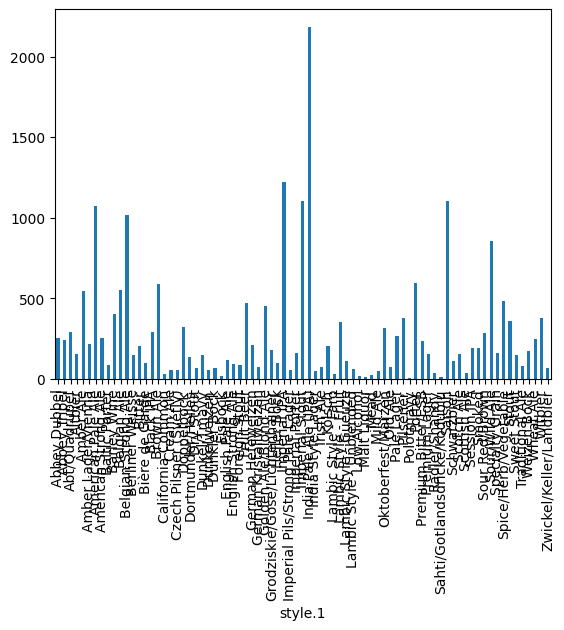

In [20]:
ratings_MatchedBeer_RB.groupby('style.1').count()['beer_id.1'].plot(kind='bar')

<Axes: xlabel='brewery_id.1'>

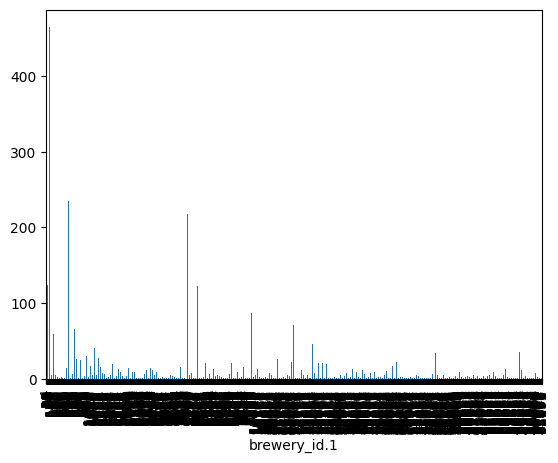

In [21]:
ratings_MatchedBeer_RB.groupby('brewery_id.1').count()['beer_id.1'].plot(kind='bar')

In [22]:
y0=ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB['style.1']== 'Pale Lager']['polarity']
y1=ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB['style.1']== 'Golden Ale/Blond Ale']['polarity']
y2=ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB['style.1']== 'India Pale Ale (IPA)']['polarity']
y3=ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB['style.1']== 'Lambic Style - Fruit']['polarity']
y4=ratings_MatchedBeer_RB.loc[ratings_MatchedBeer_RB['style.1']== 'American Pale Ale']['polarity']


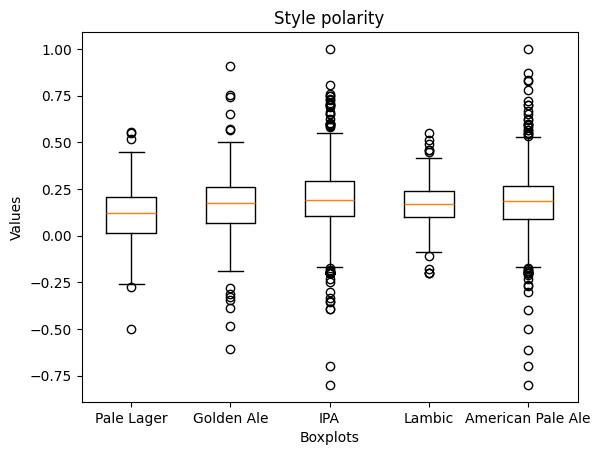

In [33]:
data = [y0, y1, y2, y3, y4]

# Create a boxplot
plt.boxplot(data)

# Set x-axis ticks and labels
plt.xticks([1, 2, 3, 4, 5], ['Pale Lager', 'Golden Ale', 'IPA', 'Lambic', 'American Pale Ale'])

# Add labels and title
plt.xlabel('Boxplots')
plt.ylabel('Values')
plt.title('Style polarity')

# Show the plot
plt.show()